# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:
# Load pickled data
import pickle
import csv

training_file = './data/train.p'
testing_file =  './data/test.p'
class_desc_file = './data/signnames.csv'
train_classes = dict ()

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)  

# Read CSV file and show sign description
with open (class_desc_file, newline='') as csvFile:
    csvReader = csv.DictReader(csvFile)  # reads first line as Column names
    
    for row in csvReader:
        train_classes[int(row['ClassId'])] = row['SignName']
        
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [4]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape   # (32, 32, 3)

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train)) 

assert(len(train_classes) == len(set(y_train))) 

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

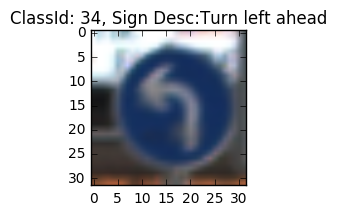

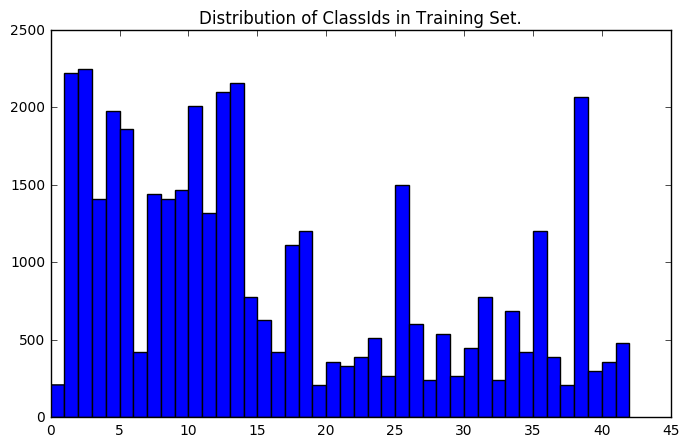

ClassId: Class Name  = Count 
0: Speed limit (20km/h)  = 210 
1: Speed limit (30km/h)  = 2220 
2: Speed limit (50km/h)  = 2250 
3: Speed limit (60km/h)  = 1410 
4: Speed limit (70km/h)  = 1980 
5: Speed limit (80km/h)  = 1860 
6: End of speed limit (80km/h)  = 420 
7: Speed limit (100km/h)  = 1440 
8: Speed limit (120km/h)  = 1410 
9: No passing  = 1470 
10: No passing for vehicles over 3.5 metric tons  = 2010 
11: Right-of-way at the next intersection  = 1320 
12: Priority road  = 2100 
13: Yield  = 2160 
14: Stop  = 780 
15: No vehicles  = 630 
16: Vehicles over 3.5 metric tons prohibited  = 420 
17: No entry  = 1110 
18: General caution  = 1200 
19: Dangerous curve to the left  = 210 
20: Dangerous curve to the right  = 360 
21: Double curve  = 330 
22: Bumpy road  = 390 
23: Slippery road  = 510 
24: Road narrows on the right  = 270 
25: Road work  = 1500 
26: Traffic signals  = 600 
27: Pedestrians  = 240 
28: Children   = 540 
29: Bicycles crossing  = 270 
30: Beware of ice/snow 

In [24]:
## Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


import random
import numpy as np
import matplotlib.pyplot as plt

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(2,2))
plt.imshow(image)

plt.title("ClassId: {}, Sign Desc:{}".format(y_train[index], train_classes[int(y_train[index])]))

plt.figure(figsize=(8, 5))
plt.hist(y_train, range(0, len(train_classes), 1) )

plt.title("Distribution of ClassIds in Training Set.")

plt.show()

from collections import Counter
cc = Counter(y_train)

print ("ClassId: Class Name  = Count ")
for k in cc:
    print ("{}: {}  = {} ".format(k, train_classes[int(k)], cc[k]))


### Data Exploration

Training set distribution shows samples are not distrubuted uniformly acrosss all classes of Traffic Signs. Top 14 classes have more than 1k samples with many more than 1.5k sample. While bottom half, 22 classes have less than 500 samples, many just one to two hundreds. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

In [28]:
# Preprocess the data
from sklearn.utils import shuffle

# Shuffle training set data
X_train, y_train = shuffle(X_train, y_train)

# Normalize training, validattion, and test set.
# Normalize values across zero mean
import numpy as np

X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Training set samples are shuffled so as make sure data in any order which is counter productive for model training are removed, like samples of same class are clustered together. 

Both Training and Test data sets are then normalized using mean substraction and feature standardization[1].Mean substraction for image data removes average brightnes, as brightness or lighting conditions of the images are not relevant for our purposes. Feature standardization makes each of dimensions data to have zero mean and unit-variance. This will reduce -ve effect of data whose range varies widely on our objective function.

[1] http://ufldl.stanford.edu/wiki/index.php/Data_Preprocessing

In [29]:
# Shuffle, Split Input training data into training and validation set of 4:1 ratio
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=5)

print()
print("New Training Set:   {} samples".format(len(X_train)))
print("New Validation Set: {} samples".format(len(X_validation)))
print("Test Set:           {} samples".format(len(X_test)))



New Training Set:   20074 samples
New Validation Set: 5019 samples
Test Set:           12630 samples


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

Sklearn module's train_test_split function is used to split 20% of the original training set data into validation set.

### Tensorflow LeNet Model

In [ ]:
# Set up LeNet 5 based model.

import tensorflow as tf

EPOCHS = 50
BATCH_SIZE = 32
KEEP_PROB = 0.70

INPUT_DEPTH = image_shape[2] # 3
NUM_CLASSES = len(train_classes) # 43

# LeNet 5
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)  # probability to keep units

l2reg = None


def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # TODO: Layer 1: Convolutional. Input = 32x32xINPUT_DEPTH. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, INPUT_DEPTH, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.bias_add(tf.nn.conv2d(x, conv1_W, [1, 1, 1, 1], 'VALID'), conv1_b)

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    c1p = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.bias_add(tf.nn.conv2d(c1p, conv2_W, [1, 1, 1, 1], 'VALID'), conv2_b)

    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    c2p = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(c2p)

    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(120))
    # fc3   = tf.matmul(fc0, conv3_W) + conv3_b
    fc3 = tf.nn.bias_add(tf.matmul(fc0, fc3_W), fc3_b)

    # TODO: Activation.
    fc3 = tf.nn.relu(fc3)
    fc3 = tf.nn.dropout(fc3, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc4_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc4_b = tf.Variable(tf.zeros(84))
    fc4 = tf.nn.bias_add(tf.matmul(fc3, fc4_W), fc4_b)

    # TODO: Activation.
    fc4 = tf.nn.relu(fc4)
    fc4 = tf.nn.dropout(fc4, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = NUM_CLASSES.
    fc5_W = tf.Variable(tf.truncated_normal(shape=(84, NUM_CLASSES), mean=mu, stddev=sigma))
    fc5_b = tf.Variable(tf.zeros(NUM_CLASSES))
    logits = tf.nn.bias_add(tf.matmul(fc4, fc5_W), fc5_b)

    # l2reg = tf.add_n([tf.nn.l2_loss(v) for v in vars if 'bias' not in v.name]) * 0.001
    global l2reg
    l2reg = 0.001 * (tf.nn.l2_loss(conv1_W) + tf.nn.l2_loss(conv2_W) + tf.nn.l2_loss(fc3_W) + tf.nn.l2_loss(fc4_W) + tf.nn.l2_loss(fc5_W))

    return logits


### Evaluate/Validate Model

In [ ]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Model used to train is LeNet.

It contains X layers, 

### Train The Model

In [ ]:
# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, INPUT_DEPTH))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, NUM_CLASSES)

# Training Pipeline
rate = 0.0003

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy) + l2reg
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

validation_accuracy = None

# Training the model
# with tf.Session( config=tf.ConfigProto(log_device_placement=True) ) as sess:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})

        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i + 1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './term1_P2')
    print("Model saved")

print ("EPOCHS = {}, BATCH_SIZE = {}, RATE = {}, Validation Accuracy = {:.3f}, KeepProb = {:.3f} ".format(
    EPOCHS, BATCH_SIZE, rate, validation_accuracy, KEEP_PROB))

### Test The Model

In [ ]:
# Evaluate the model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

This I did using LeNet network with below tuned hyper parameters, after normalizing the input data and adding L2 regularization:
EPOCHS = 50
BATCH_SIZE = 32 (tried from 8 to 512)
RATE = 0.0003 (learning rate, tried 0.0001 to 0.001)  
Keep Prob = 70% ( 30% drop-out)
- Used RGB image as input, CV2 grayscale function did not work me. 
- L2 Regularization did not improve accuracy
- Assumed image labeling are correct, and did not render and verify visually the images failed classification.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

-  1
-  Without Normalization
-  EPOCHS = 10
-  BATCH_SIZE = 128
-  rate = 0.001
-  EPOCH 10 ...
-  Validation Accuracy = 0.954


-  2
-  With Normalization
-  EPOCHS = 10
-  rate = 0.001
-  BATCH_SIZE = 128
-  EPOCH 10 ...
-  Validation Accuracy = 0.969

-  3
-  With Normalization
-  EPOCHS = 10
-  rate = 0.001
-  BATCH_SIZE = 256
-  EPOCH 10 ...
-  Validation Accuracy = 0.972

-  4
-  With Normalization
-  EPOCHS = 10
-  rate = 0.001
-  BATCH_SIZE = 512
-  EPOCH 10 ...
-  Validation Accuracy = 0.952

-  5
-  With Normalization
-  EPOCHS = 15
-  rate = 0.001
-  BATCH_SIZE = 256
-  EPOCH 15 ...
-  Validation Accuracy = 0.978

-  6
-  With Normalization
-  EPOCHS = 15
-  rate = 0.01
-  BATCH_SIZE = 256
-  EPOCH 10 ...
-  Validation Accuracy = 0.952
-  EPOCH 15 ...
-  Validation Accuracy = 0.950

-  7
-  With Normalization
-  EPOCHS = 15
-  rate = 0.005
-  BATCH_SIZE = 256
-  EPOCH 10 ...
-  Validation Accuracy = 0.949
-  EPOCH 14 ...
-  Validation Accuracy = 0.978
-  EPOCH 15 ...
-  Validation Accuracy = 0.968

-  8
-  With Normalization
-  EPOCHS = 15
-  rate = 0.002
-  BATCH_SIZE = 256
-  EPOCH 10 ...
-  Validation Accuracy = 0.975
-  EPOCH 13 ...
-  Validation Accuracy = 0.982
-  EPOCH 15 ...
-  Validation Accuracy = 0.976

-  9
-  With Normalization
-  EPOCHS = 10
-  rate = 0.001
-  BATCH_SIZE = 64
-  EPOCH 10 ...
-  Validation Accuracy = 0.978

-  9
-  With Normalization
-  EPOCHS = 15, BATCH_SIZE = 64, RATE = 0.001
-  EPOCH 15 ...
-  Validation Accuracy = 0.982
-  Test Accuracy = 0.909

-  10
-  With Normalization, 30% drop-out
-  EPOCHS = 15, BATCH_SIZE = 64, RATE = 0.001
-  EPOCH 15 ...
-  Validation Accuracy = 0.981


-  11
-  With Normalization, 30% drop-out, L2 Regularization
-  EPOCHS = 15, BATCH_SIZE = 64, RATE = 0.001
-  EPOCH 15 ...
-  Validation Accuracy = 0.980


-  12
-  With Normalization, 30% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 15, BATCH_SIZE = 64, RATE = 0.001
-  EPOCH 15 ...
-  Validation Accuracy = 0.981


-  13
-  With Normalization, 30% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 15, BATCH_SIZE = 32, RATE = 0.001
-  EPOCH 15 ...
-  Validation Accuracy = 0.979



-  14
-  With Normalization, 30% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 15, BATCH_SIZE = 8, RATE = 0.005
-  EPOCH 15 ...
-  Validation Accuracy = 0.695


-  15
-  With Normalization, 30% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 15, BATCH_SIZE = 16, RATE = 0.005
-  EPOCH 15 ...
-  Validation Accuracy = 0.797


-  16
-  With Normalization, 30% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 25, BATCH_SIZE = 32, RATE = 0.001
-  EPOCH 25 ...
-  Validation Accuracy = 0.980


-  17
-  With Normalization, 30% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 25, BATCH_SIZE = 32, RATE = 0.0005
-  EPOCH 25 ...
-  Validation Accuracy = 0.986


-  18
-  With Normalization, 50% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 30, BATCH_SIZE = 32, RATE = 0.0003
-  EPOCH 30 ...
-  Validation Accuracy = 0.954


-  19
-  With Normalization, 50% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 50, BATCH_SIZE = 32, RATE = 0.0003
-  EPOCH 50 ...
-  Validation Accuracy = 0.957



-  20
-  With Normalization, 40% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 50, BATCH_SIZE = 32, RATE = 0.0003
-  EPOCH 50 ...
-  Validation Accuracy = 0.978

-  21
-  With Normalization, 35% drop-out, L2 Regularization, stratify=y_train
-  EPOCHS = 50, BATCH_SIZE = 32, RATE = 0.0003
-  EPOCH 50 ...
-  Validation Accuracy = 0.983


-  21
-  With Normalization, 35% drop-out, L2 Regularization, stratify=None
-  EPOCHS = 50, BATCH_SIZE = 32, RATE = 0.0003
-  EPOCH 50 ...
-  Validation Accuracy = 0.984


- 22
-  With Normalization, 30% drop-out, L2 Regularization, stratify=None
-  EPOCHS = 50, BATCH_SIZE = 32, RATE = 0.0003
-  EPOCH 50 ...
-  Validation Accuracy = 0.986
-  Test Accuracy = 0.94


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.